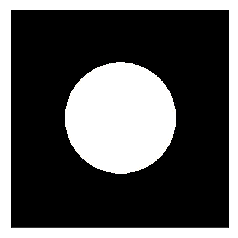

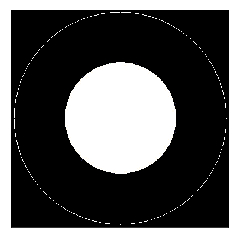

2.748893571891069
4.843288674284264
6.93768377667746


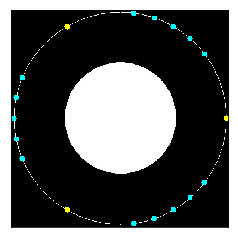

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math as m

def load(name):
    im = cv2.imread(name)
    return im

def plot(img):
    fig = plt.imshow(img)
    tmp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(tmp)
    plt.xticks([]), plt.yticks([])
    plt.show()

def sinogram(img, steps=12, l=45, detectors=5): 
    alfa = 360 / steps
    alfaRadians = m.radians(alfa)
    center = (int)(img.shape[0] / 2)
    radius = center - 5 
    centerTuple = (center, center)
    cv2.circle(img, centerTuple, radius, (255,255,255))
    plot(img)
    tmpRadians = 0
    for i in range(steps):
        x = center + int(radius * np.cos(tmpRadians))
        y = center + int(radius * np.sin(tmpRadians))
        cv2.circle(img, (x,y), 5, (0,255,255), -1)
        tmpDetectorRadians = m.radians(180 - l/2) + tmpRadians
        print(tmpDetectorRadians)
        detectorStep = m.radians(l / (detectors - 1))
        for j in range(detectors):
            xDet = center + int(radius * np.cos(tmpDetectorRadians))
            yDet = center + int(radius * np.sin(tmpDetectorRadians))
            tmpDetectorRadians += detectorStep
            cv2.circle(img, (xDet,yDet), 5, (255,255,0), -1)

        tmpRadians += alfaRadians
        
    plot(img)
    
    
    
img = load("Kolo.bmp")
plot(img)
sinogram(img,3,45,5)